## SIADS Milestone I: CFB Analysis

This notebook will help answer these questions: 

1. What’s the minimum talent threshold required to compete at the top of the sport?  
2. Teams that were in the championship vs. the teams that weren’t in the championships, what % were drafted? 


In [31]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
pd.set_option('display.max_columns', None)

### 1. What's the minimum talent threshold required to compete at the top of the sport? 


**Approach:** 
We are going to leveraging the ELO rating to evaluate what the top of the sport means. 
And the minimum talent threshold we will be looking is the recruitment rating 

**Visuals:** 

ELO rating vs. Team Roster: 
* higher ELO meeadning that they played at the top of the sport - Hue oof the Championships (Almost Done)

Percentile Visual:
* X-axis percentile of the ELO rating (top 10%)
* Y-axis % of all championships that are in the percentile 

**Data Manipulation:**




In [3]:
# df_teams = pd.read_csv('../data/teams.csv',low_memory=False)
# df_recruits = pd.read_csv('../data/recruits.csv',low_memory=False)
# df_roster = pd.read_csv('../data/roster.csv',low_memory=False)
# df_draft = pd.read_csv('../data/draft.csv',low_memory=False)
# df_team_talent = pd.read_csv('../data/team_talent.csv',low_memory=False)

In [4]:
df = pd.read_csv('../data/games_manipulated.csv', low_memory=False)
df_team_talent = pd.read_csv('../data/team_talent.csv',low_memory=False)

print(df.head().to_markdown(), '\n')
print(df_team_talent.head().to_markdown() )

|    |   Unnamed: 0 |   index |        id |   season |   week | season_type   | start_date               |   start_time_tbd | completed   | neutral_site   | conference_game   |   attendance |   venue_id | venue                  |   excitement_index |   highlights |   notes | main_team      |   home_game_flag |   team_id |   opposing_team_id | team_conference   | opposing_conference   |   points_for |   points_against |   point_differential | team_line_scores   | opposing_line_scores   |   team_pregame_elo |   team_postgame_elo |   opponent_pregame_elo |   opponent_postgame_elo |   win_flag |   game_that_season |
|---:|-------------:|--------:|----------:|---------:|-------:|:--------------|:-------------------------|-----------------:|:------------|:---------------|:------------------|-------------:|-----------:|:-----------------------|-------------------:|-------------:|--------:|:---------------|-----------------:|----------:|-------------------:|:------------------|:---------------

In [5]:
## When does this missingness happen? 
power_5_conf = ['Pac-12', 'Big 12', 'ACC', 'SEC', 'Big Ten']

# narrow down the dataframe with just these columns
cols = ['season', 'game_that_season', 'season_type',
         'team_conference','main_team','opposing_team_id',
         'conference_game','team_postgame_elo', 
         'team_pregame_elo', 'win_flag']
filtered_df = df[cols]

# Filter down thee population to the following
filtered_df = filtered_df[filtered_df['game_that_season'] == 12] # moroe ELO data 
filtered_df = filtered_df[filtered_df['team_conference'].isin(power_5_conf)] # more serious teams
filtered_df = filtered_df[filtered_df['season'] != 2020] # outliar

# Rename columns 
filtered_df.rename(columns={'season':'year', 'main_team': 'school'},inplace=True) 
print(filtered_df.head().to_markdown() )

# Only look at schoools that are in the power 5 conference
teams = filtered_df['school'].unique() 
print(f'\nTeams that participate in the Power 5 Conference:\n\n{teams}\n') 
filtered_team_talend_df = df_team_talent[df_team_talent['school'].isin(teams)]
print(filtered_team_talend_df.head().to_markdown() )


|    |   year |   game_that_season | season_type   | team_conference   | school         |   opposing_team_id | conference_game   |   team_postgame_elo |   team_pregame_elo |   win_flag |
|---:|-------:|-------------------:|:--------------|:------------------|:---------------|-------------------:|:------------------|--------------------:|-------------------:|-----------:|
|  6 |   2013 |                 12 | regular       | SEC               | South Carolina |                228 | False             |                2024 |               2001 |          1 |
| 20 |   2015 |                 12 | regular       | SEC               | South Carolina |                228 | False             |                1579 |               1561 |          0 |
| 35 |   2017 |                 12 | regular       | SEC               | South Carolina |                228 | False             |                1572 |               1586 |          0 |
| 42 |   2018 |                 12 | regular       | SEC         

In [6]:
# Combine the team talent talent data with the teams ELO 
total_elo_talent = pd.merge(filtered_team_talend_df, filtered_df, on=['year', 'school']) 
total_elo_talent.head() 

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1


In [7]:
# Get the Championship flag 
substr_1 = 'NATIONAL CHAMPIONSHIP'
substr_2 = 'National Championship'

df = df[df['notes'].notna()]
a = df[df['notes'].str.contains(substr_1)]
b = df[df['notes'].str.contains(substr_2)]

championship_games = pd.concat([a, b])
championship_games['championship_appearance'] = 1
championship_games = championship_games.sort_values(by = 'season', ascending = True)[['main_team', 'season', 'win_flag', 'championship_appearance']]

championship_games= championship_games.rename(columns={'main_team': 'school', 'season': 'year'})
print(championship_games.to_markdown())

# Check that there are two teams perseason that went to the championship 
# championship_games.groupby('season')['championship_appearance'].count()

|       | school        |   year |   win_flag |   championship_appearance |
|------:|:--------------|-------:|-----------:|--------------------------:|
| 11244 | Auburn        |   2013 |          0 |                         1 |
| 25045 | Florida State |   2013 |          1 |                         1 |
|  5104 | Ohio State    |   2014 |          1 |                         1 |
|  8324 | Oregon        |   2014 |          0 |                         1 |
| 13351 | Clemson       |   2015 |          0 |                         1 |
| 29958 | Alabama       |   2015 |          1 |                         1 |
| 29896 | Alabama       |   2016 |          0 |                         1 |
| 13416 | Clemson       |   2016 |          1 |                         1 |
| 18029 | Georgia       |   2017 |          0 |                         1 |
| 29960 | Alabama       |   2017 |          1 |                         1 |
| 13417 | Clemson       |   2018 |          1 |                         1 |
| 29898 | Al

In [8]:
# Left Join the Championship data into the total_elo_talent
elo_championship_df = total_elo_talent.merge( championship_games, on=['year', 'school'], how='left' )
elo_championship_df['championship_appearance'] = elo_championship_df['championship_appearance'].fillna(0) # Fill na with 0 
elo_championship_df.head() 

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag_x,win_flag_y,championship_appearance
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1,1.0,1.0
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1,NaN,0.0
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1,NaN,0.0
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1,NaN,0.0
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1,NaN,0.0


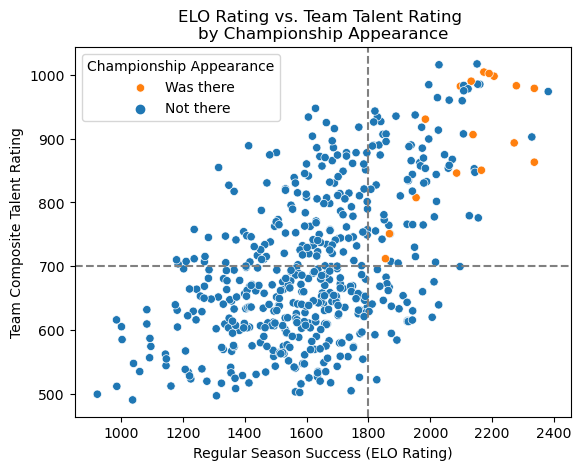

In [9]:
# Plot the Team's ELO and Talent Roster
scatter = sns.scatterplot(data=elo_championship_df, x='team_postgame_elo', y='talent', hue='championship_appearance')

x_value = 1800.0
y_value = 700.0

# Add labels to x-axis and y-axis
plt.xlabel('Regular Season Success (ELO Rating)')
plt.ylabel('Team Composite Talent Rating')

plt.axvline(x=x_value, color='gray', linestyle='--')
plt.axhline(y=y_value, color='gray', linestyle='--')
scatter.legend(title='Championship Appearance', labels=['Was there', 'Not there'], loc='upper left')
               
plt.title('ELO Rating vs. Team Talent Rating \nby Championship Appearance' )
plt.show() 

In [ ]:
# Group together Team Composity Score over 700 and under 700 
# get % that are drafted 

In [10]:
import altair as alt

scatter = alt.Chart(elo_championship_df).mark_circle(size = 60, opacity = .90).encode(
    alt.X('talent:Q', scale=alt.Scale(domain=[400, 1100]), title = 'Team Composite Talent Rating'),
    alt.Y('team_postgame_elo:Q', scale=alt.Scale(domain=[800, 2500]), title = 'Regular Season Success (ELO Rating)'),
    color = 'championship_appearance:N',
    tooltip = ['year']).properties(
    width = 500, height = 500, title = 'Team Talent Rating vs Regular Season Success (ELO)')

elo_line = alt.Chart(elo_championship_df).mark_rule(color="#e60634", size = 3, strokeDash=[9,3], opacity = .85).encode(
    y = 'mean(team_postgame_elo)')

talent_line = alt.Chart(elo_championship_df).mark_rule(color="#e60634", size = 3, strokeDash=[9,3], opacity = .85).encode(
    x = 'mean(talent)')

final  = scatter + elo_line + talent_line

final

alt.LayerChart(...)

In [22]:
#  What percent of teams have a team composite talent rating above 700? 
talent_percent_above_700 = elo_championship_df[elo_championship_df['talent'] >= 700].shape[0] / elo_championship_df.shape[0]
print(f'Percent of teams that have a team composity talent rating above 700 : {talent_percent_above_700}')

# What percent of teams get to an ELO above 1800? 
elo_percent_above_1800= elo_championship_df[elo_championship_df['team_postgame_elo'] >= 1800].shape[0] / elo_championship_df.shape[0]
print(f'Percent of teams that have a ELO above 1800 : {elo_percent_above_1800}')

# What percent of teams have an ELO above 1800 & team composite taleent rating above 700? 
percent_threshold = elo_championship_df[(elo_championship_df['team_postgame_elo'] >= 1800) & (elo_championship_df['talent'] >= 700)].shape[0] / elo_championship_df.shape[0]
print(f'Percent of teams that have a ELO above 1800 AND Team Compositee Talent Rating above 700 : {percent_threshold}')


Percent of teams that have a team composity talent rating above 700 : 0.43052837573385516
Percent of teams that have a ELO above 1800 : 0.22504892367906065
Percent of teams that have a ELO above 1800 AND Team Compositee Talent Rating above 700 : 0.17221135029354206


In [76]:
elo_championship_df.head()

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag_x,win_flag_y,championship_appearance
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1,1.0,1.0
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1,NaN,0.0
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1,NaN,0.0
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1,NaN,0.0
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1,NaN,0.0


## 2. Teams that were in the championship vs. the teams that weren't, what % were drafted? 

**Approoach:** Show a simple bar graph with the x-axis as Championship and y-axis as the % that were drafted. 


In [79]:
df_draft = pd.read_csv('../data/draft.csv')
df_draft = df_draft.rename(columns={'College/Univ': 'team'})
columns = ['Player', 'team', 'draft_year']
df_draft = df_draft[columns] 
print(df_draft.head().to_markdown())

|    | Player        | team             |   draft_year |
|---:|:--------------|:-----------------|-------------:|
|  0 | Eric Fisher   | Central Michigan |         2013 |
|  1 | Luke Joeckel  | Texas A&M        |         2013 |
|  2 | Dion Jordan   | Oregon           |         2013 |
|  3 | Lane Johnson  | Oklahoma         |         2013 |
|  4 | Ezekiel Ansah | BYU              |         2013 |


In [80]:
df_roster = pd.read_csv('../data/roster.csv',low_memory=False)

# Combine first and last name in draft data to get player from roster
df_roster['Player'] = df_roster['first_name'] + ' '+ df_roster['last_name']
columns = ['Player', 'team', 'year']
df_roster = df_roster[columns]
print(df_roster.head().to_markdown())


|    | Player           | team             |   year |
|---:|:-----------------|:-----------------|-------:|
|  0 | Justin Johnson   | Fresno State     |   2015 |
|  1 | Jamaal Jackson   | Delaware State   |   2015 |
|  2 | Johnny Jackson   | Arizona          |   2015 |
|  3 | Jason Johnson    | Western Kentucky |   2015 |
|  4 | Nicholas Peoples | Grambling        |   2015 |


In [97]:
merged_df = pd.merge(left = df_roster , right = df_draft, how = 'left', left_on = ['team', 'Player'], right_on= ['team', 'Player'])
merged_df = merged_df.drop_duplicates()
merged_df['draft_flag'] = merged_df['draft_year'].notnull().astype(int)

print(merged_df.head().to_markdown() )

|    | Player           | team             |   year |   draft_year |   draft_flag |
|---:|:-----------------|:-----------------|-------:|-------------:|-------------:|
|  0 | Justin Johnson   | Fresno State     |   2015 |          nan |            0 |
|  1 | Jamaal Jackson   | Delaware State   |   2015 |          nan |            0 |
|  2 | Johnny Jackson   | Arizona          |   2015 |          nan |            0 |
|  3 | Jason Johnson    | Western Kentucky |   2015 |          nan |            0 |
|  4 | Nicholas Peoples | Grambling        |   2015 |          nan |            0 |


In [168]:
# Add in the teams data
df = pd.read_csv('../data/games_manipulated.csv', low_memory=False)
df_team_talent = pd.read_csv('../data/team_talent.csv',low_memory=False)
# print(df.columns) 
power_5_conf = ['Pac-12', 'Big 12', 'ACC', 'SEC', 'Big Ten']

df = df[df['game_that_season'] == 12][['season','main_team', 'team_conference', 'team_postgame_elo']] # unique name 
df = df[df['team_conference'].isin(power_5_conf)]

schools_filtered = df['main_team'].unique() # schools that are in the power 5 conf 
df = df[df['season'] != 2020] # outliar
df = df.rename(columns={'main_team': 'school', 'season': 'year'})

print(df.head().to_markdown(), '\n')
print(df_team_talent.head().to_markdown() )
df_teams_data_combined = pd.merge(df, df_team_talent,  how = 'inner', left_on=['school', 'year'], right_on=['school', 'year'])
print(df_teams_data_combined.head().to_markdown())

|     |   year | school         | team_conference   |   team_postgame_elo |
|----:|-------:|:---------------|:------------------|--------------------:|
|  56 |   2023 | UCF            | Big 12            |                1658 |
| 120 |   2015 | South Carolina | SEC               |                1579 |
| 135 |   2017 | South Carolina | SEC               |                1572 |
| 142 |   2018 | South Carolina | SEC               |                1641 |
| 149 |   2019 | South Carolina | SEC               |                1497 | 

|    |   year | school        |   talent |
|---:|-------:|:--------------|---------:|
|  0 |   2015 | Alabama       |   981.9  |
|  1 |   2015 | USC           |   926.71 |
|  2 |   2015 | Ohio State    |   907.32 |
|  3 |   2015 | Florida State |   889.92 |
|  4 |   2015 | LSU           |   889.37 |
|    |   year | school         | team_conference   |   team_postgame_elo |   talent |
|---:|-------:|:---------------|:------------------|--------------------:|-----

In [180]:
# merged_df.head() 
combine_draft_team = pd.merge(merged_df, df_teams_data_combined, how='left',  left_on=['team', 'year'], right_on=['school', 'year'])
combine_draft_team = combine_draft_team[combine_draft_team['team'].isin(schools_filtered)]
combine_draft_team.head() 

,Player,team,year,draft_year,draft_flag,school,team_conference,team_postgame_elo,talent
2,Johnny Jackson,Arizona,2015,NaN,0,Arizona,Pac-12,1495.0,606.92
7,Josh Moore,Missouri,2015,NaN,0,Missouri,SEC,1557.0,642.93
8,Brian Smith,Minnesota,2015,NaN,0,Minnesota,Big Ten,1582.0,516.10
12,Brett Johnson,California,2015,NaN,0,California,Pac-12,1567.0,626.00
13,Kyle Williams,Arizona State,2015,NaN,0,Arizona State,Pac-12,1666.0,680.87


In [181]:
# Add championship 
combine_draft_team = pd.merge(combine_draft_team, championship_games, how='left',  left_on=['school', 'year'], right_on=['school', 'year'])
combine_draft_team['championship_appearance'].fillna(0, inplace=True)
combine_draft_team.head()

,Player,team,year,draft_year,draft_flag,school,team_conference,team_postgame_elo,talent,win_flag,championship_appearance
0,Johnny Jackson,Arizona,2015,NaN,0,Arizona,Pac-12,1495.0,606.92,NaN,0.0
1,Josh Moore,Missouri,2015,NaN,0,Missouri,SEC,1557.0,642.93,NaN,0.0
2,Brian Smith,Minnesota,2015,NaN,0,Minnesota,Big Ten,1582.0,516.10,NaN,0.0
3,Brett Johnson,California,2015,NaN,0,California,Pac-12,1567.0,626.00,NaN,0.0
4,Kyle Williams,Arizona State,2015,NaN,0,Arizona State,Pac-12,1666.0,680.87,NaN,0.0


In [198]:
grouped_data = combine_draft_team.groupby(['team', 'year', 'talent', 'team_postgame_elo', 'championship_appearance']).agg({'draft_flag': ['count', 'sum']})
grouped_data['draft_percentage'] = (grouped_data['draft_flag']['sum'] / grouped_data['draft_flag']['count']) * 100
grouped_data.columns = grouped_data.columns.droplevel(0)
grouped_data.columns = ['count_draft_flag', 'sum_draft_flag', 'draft_percentage']
grouped_data.reset_index(inplace=True) 
print(grouped_data.head().to_markdown())

|    | team    |   year |   talent |   team_postgame_elo |   championship_appearance |   count_draft_flag |   sum_draft_flag |   draft_percentage |
|---:|:--------|-------:|---------:|--------------------:|--------------------------:|-------------------:|-----------------:|-------------------:|
|  0 | Alabama |   2015 |   981.9  |                2097 |                         1 |                 71 |               28 |            39.4366 |
|  1 | Alabama |   2016 |   982.66 |                2278 |                         1 |                 88 |               32 |            36.3636 |
|  2 | Alabama |   2017 |   997.57 |                2206 |                         1 |                 92 |               35 |            38.0435 |
|  3 | Alabama |   2018 |   978.54 |                2336 |                         1 |                 98 |               30 |            30.6122 |
|  4 | Alabama |   2019 |   984.96 |                2160 |                         0 |                126 |     

In [199]:
grouped_data = grouped_data.rename(columns={'championship_appearance': 'Appear in Championships', 'draft_percentage': 'Percentage of Team Drafted'})
grouped_data.head() 

,team,year,talent,team_postgame_elo,Appear in Championships,count_draft_flag,sum_draft_flag,Percentage of Team Drafted
0,Alabama,2015,981.90,2097.0,1.0,71,28,39.436620
1,Alabama,2016,982.66,2278.0,1.0,88,32,36.363636
2,Alabama,2017,997.57,2206.0,1.0,92,35,38.043478
3,Alabama,2018,978.54,2336.0,1.0,98,30,30.612245
4,Alabama,2019,984.96,2160.0,0.0,126,29,23.015873


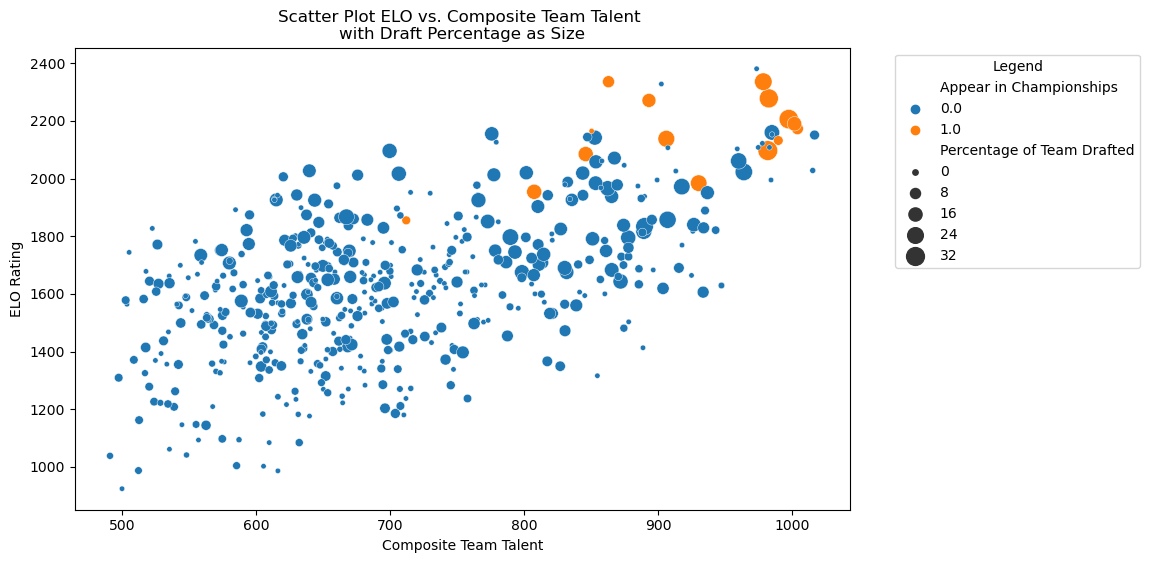

In [201]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

sns.scatterplot(data=grouped_data, x='talent', y='team_postgame_elo', hue='Appear in Championships', size='Percentage of Team Drafted', sizes=(15, 200))
plt.title('Scatter Plot ELO vs. Composite Team Talent \nwith Draft Percentage as Size')
plt.xlabel('Composite Team Talent')
plt.ylabel('ELO Rating')

# Move the legend outside of the chart
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')


In [156]:
grouped_data.index

RangeIndex(start=0, stop=511, step=1)

In [104]:
# merged_df[(merged_df['team'] == 'Michigan') &( merged_df['draft_flag'] == 1) & ( merged_df['year'] >2020)]

In [124]:
# merged_df = pd.merge(left = df_roster , right = df_draft, how = 'left', left_on = ['team', 'year'], right_on= ['team', 'year'])
# merged_df[merged_df['Player'] == 'Isaac Asiata'].head() 

In [125]:
# merged_df[merged_df[['team', 'Player','draft_year']].duplicated()][merged_df['draft_flag'] == 1].head() 

In [38]:
# # Function to check if there are at least 4 sequential characters in common
# # If the name of the school they committed to matches the name they were drafted from, then return a 1:
# def has_common_sequence(str1, str2, min_seq_length=4):
#     if pd.isna(str1) or pd.isna(str2):
#         return 0

#     for i in range(len(str1) - min_seq_length + 1):
#         sequence = str1[i:i + min_seq_length]
#         if sequence in str2:
#             return 1
#     return 0

# # Apply the function to the DataFrame
# merged_df['CommonSequence'] = merged_df.apply(lambda row: has_common_sequence(row['committed_to'], row['College/Univ']), axis=1)

# merged_df['RN'] = merged_df.sort_values(['name','CommonSequence'], ascending=[True,False]) \
#                            .groupby(['name', 'rating']) \
#                            .cumcount() + 1

# col = ['name', 'rating', 'stars', 'committed_to', 'athlete_id', 'Rnd', 'Pick', 'Player', 'draft_year', 'College/Univ', 'CommonSequence', 'RN']
# merged_df = merged_df[col]

In [39]:
# # Remove duplicates
# merged_df = merged_df[merged_df['RN'] == 1]
# merged_df['is_drafted'] = np.where(merged_df['Rnd'].isna(), 0.0, 1.0)

In [40]:
# merged_df
